In [2]:
# https://github.com/albertotb/get-gfs/blob/master/xarray_example.py

import numpy as np
import xarray as xr
import pandas as pd
import datetime as dt
from datetime import timedelta
from itertools import chain
import requests
from urllib.request import urlopen
import os
import ipywidgets as widgets # For ease in selecting variables.
import datetime
import pygrib
from sqlalchemy import create_engine


In [ ]:
# range1 = lambda start, end, step=1: np.arange(start, end+step, step)
# date = (dt.date.today() - dt.timedelta(days=1)).strftime("%Y%m%d") 
# gfs = f'https://nomads.ncep.noaa.gov/dods/gfs_0p25_1hr'

# lat = (-2, 2)
# # Since lon is in the range 0, 360 and not -180, 180 it is common wanting to download a non-consecutive interval
# # For instance 0, 0.25 and 358,359.75. This would correspond to -2, 0.25 in -180, 180 range
# # Then we cannot use a slice object, we need to explicitily list all values
# lon = list(chain(range1(0, 2, 0.25), range1(358, 359.75, 0.25)))
# time = (0, 24)
# var = ['tmp2m', 'prmslmsl', 'apcpsfc']

# print(date)
# print(lon)

# for hour in [0, 6]:
#     url = f'{gfs}/gfs{date}/gfs_0p25_1hr_{hour:02d}z'
#     print(url)
#     with xr.open_dataset(url) as ds:
#         (ds[var].isel(time=slice(*time))
#                 .sel(lat=slice(*lat), lon=lon)
#                 .to_netcdf(f'{date}_{hour:02d}.nc'))
#         # print(ds[var].isel(time=slice(*time)))

In [ ]:
# dt = '20220429'
# res = 25
# step = '1hr'
# # run = '{:02}'.format(0) # original
# run = '18'
# lat_toplot = np.arange(-43, -17.25, 0.25) # last number is exclusive
# lon_toplot = np.arange(135, 152.25, 0.25) # last number is exclusive
# # lat_toplot = [-43.835, -9.796]
# # lan_toplot = [112.500,154.688]
# # query = "ugrd10m[2][185:321][450:619]"
# # info = "ascii?{query}".format(query = query)

In [ ]:
# URL = f'http://nomads.ncep.noaa.gov/dods/gfs_0p{res}_{step}/gfs{dt}/gfs_0p{res}_{step}_{run}z.{info}'
URL = f'http://nomads.ncep.noaa.gov/dods/gfs_0p{res}_{step}/gfs{dt}/gfs_0p{res}_{step}_{run}z'
print(URL)

In [ ]:
# # URL = f'http://nomads.ncep.noaa.gov/dods/gfs_0p{res}_{step}/gfs{dt}/gfs_0p{res}_{step}_{run}z.{info}'
# # https://nomads.ncep.noaa.gov/dods/gfs_0p25/gfs20220427/gfs_0p25_00z.ascii?ugrd10m[2][185:321][450:619]

# # variables = ['ugrd100m', 'vgrd100m', 'dswrfsfc', 'tcdcclm', 'tcdcblcll',
# #              'tcdclcll', 'tcdcmcll', 'tcdchcll', 'tmp2m', 'gustsfc']

# variables = ['ugrd100m', 'vgrd100m']

# # dataset = xr.open_dataset(URL)[variables]
# dataset = xr.open_dataset(URL)
# time = dataset.variables['time']
# lat = dataset.variables['lat'][:] 
# lon = dataset.variables['lon'][:]


In [ ]:
# time_toplot = time

In [ ]:
# # Select required data via xarray
# dataset = dataset.sel(time=time_toplot, lon=lon_toplot, lat=lat_toplot)
# print(dataset)

In [ ]:
# df = dataset.to_dataframe()
# # df = df.unstack(level=-1).fillna(0)
# print(df)

In [ ]:
# df

In [ ]:
import getgfs

In [ ]:
f=getgfs.Forecast("0p25")
# re.findall(r"\[(.*?):", inpt)

In [ ]:
res=f.get(["ugrd10m"],"20220427 5:30", "[-43.835:-9.796]","[112.500:154.688]")

In [ ]:
# "gustsfc"
res.variables["ugrd10m"].data
#  [-43.835, -9.796]
# LonBounds = [112.500,154.688]

In [ ]:
res.__getattribute__

In [ ]:
inpt = "[12.2:34.4]"
val_1 = float(re.findall(r"\[(.*?):", inpt)[0])
val_2 = float(re.findall(r"\:(.*?)]", inpt)[0])

In [ ]:
"https://nomads.ncep.noaa.gov/cgi-bin/filter_gfs_0p50.pl?file=gfs.t06z.pgrb2full.0p50.f000&all_lev=on&var_ABSV=on&var_GUST=on&var_TMAX=on&var_TMIN=on&var_TMP=on&leftlon=112.500&rightlon=154.688&toplat=-9.796&bottomlat=-43.835&dir=%2Fgfs.20220507%2F06%2Fatmos"

In [ ]:
# urls = ["https://nomads.ncep.noaa.gov/cgi-bin/filter_gfs_0p50.pl?file=gfs.t06z.pgrb2full.0p50.f000&all_lev=on&var_GFLUX=on&var_PRES=on&var_TMAX=on&var_TMIN=on&var_TMP=on&var_TSOIL=on&var_VEG=on&var_VFLX=on&var_VGRD=on&subregion=&leftlon=112.500&rightlon=154.688&toplat=-9.796&bottomlat=-43.835&dir=%2Fgfs.20220507%2F06%2Fatmos"]
# urls = ["https://nomads.ncep.noaa.gov/cgi-bin/filter_gfs_0p50.pl?file=gfs.t06z.pgrb2full.0p50.f000&lev_0.1-0.4_m_below_ground=on&lev_1000_m_above_ground=on&lev_100_m_above_ground=on&var_GFLUX=on&var_PRES=on&var_TMAX=on&var_TMIN=on&var_TMP=on&var_TSOIL=on&var_VEG=on&var_VFLX=on&var_VGRD=on&subregion=&leftlon=112.500&rightlon=154.688&toplat=-9.796&bottomlat=-43.835&dir=%2Fgfs.20220507%2F06%2Fatmos"]
urls = ["https://nomads.ncep.noaa.gov/cgi-bin/filter_gfs_0p50.pl?file=gfs.t06z.pgrb2full.0p50.f000&all_lev=on&var_TMP=on&subregion=&leftlon=112.500&rightlon=153.569&toplat=-9.796&bottomlat=-43.835&dir=%2Fgfs.20220507%2F06%2Fatmos"]
block_size = 1024 #1 Kibibyte

for url in urls:
    filename = "randomdata3.f000"
    print(f"Downloading {filename}...")
    site = urlopen(url)
    meta = site.info()
    # Streaming, so we can iterate over the response.
    response = requests.get(url, stream = True)
    total_size_in_bytes = int(meta["Content-Length"]) if meta["Content-Length"] is not None else 0
    with open(filename, 'wb') as file:
        for data in response.iter_content(block_size):
            file.write(data)
    print("Done!\n")

In [ ]:
import pygrib, xarray as xr, cfgrib
import matplotlib.pyplot as plt

In [ ]:
grbs = pygrib.open('randomdata3.f000')

In [ ]:
grbs.seek(0)

In [ ]:
grbs.tell()

In [ ]:
grbs.read(1)[0]

In [ ]:
grbs.seek(0)
for grb in grbs:
    print(grb)

In [ ]:
ds = xr.open_dataset("randomdata.f000", engine="cfgrib", filter_by_keys={'typeOfLevel': 'surface'})

In [ ]:
ds.data_vars

In [ ]:
ds.veg.plot()

In [ ]:
ds = xr.open_dataset("finaloutput.f000", engine="cfgrib")

In [ ]:
for v in ds:
    print("{}, {}, {}".format(v, ds[v].attrs["long_name"], ds[v].attrs["units"]))

In [ ]:
df = ds.to_dataframe()

In [ ]:
df.head()

In [ ]:
df.to_csv('/pollensource/gfs_data_ver1.csv')

In [ ]:
import pandas as pd
df2 = pd.read_csv("/pollensource/gfs_data_ver1.csv")
df2.head()

In [ ]:
cfgrib.open_datasets('randomdata.f000')

In [ ]:
ds.dims

In [ ]:
ds.t.plot(cmap=plt.cm.coolwarm, col= 'time', col_wrap=4)

In [ ]:
ds = xr.open_dataset("finaloutput.f000", engine="cfgrib", filter_by_keys={'typeOfLevel': 'surface'})
ds

In [ ]:
for iDaysBack in range(0,1):
        lastStartDatetime = startDatetime + datetime.timedelta(days=-iDaysBack)
        lastStartDatetimeStr = lastStartDatetime.strftime('%Y%m%d%H')
        ## get the files for the previous 24 hours:
        # ncfiles = ['ACCESS-R_{}_{:03d}_surface.nc'.format(lastStartDatetimeStr,ihour) for ihour in range(24)]


In [15]:
import datetime, requests
response = requests.get('http://opendap.bom.gov.au:8080/thredds/catalog/bmrc/access-r-fc/ops/surface/latest/catalog.html')
html = response.text
ncfiles = [ line for line in html.split('\n') if line.find('_surface.nc') >= 0 ]
ncfiles = [ line.split('tt>')[1].split('<')[0] for line in ncfiles ]
startDatetimeStr = ncfiles[0].split('_')[1]
startDatetime = datetime.datetime.strptime(startDatetimeStr,'%Y%m%d%H')
outlookHours = [int(ncfile.split('_')[2]) for ncfile in ncfiles]

startDatetime = datetime.datetime.strptime(startDatetimeStr,'%Y%m%d%H')

In [6]:
startDatetimeStr, startDatetime

('2020092418', datetime.datetime(2020, 9, 24, 18, 0))

In [4]:
date_object = datetime.date.today()
date = [''.join(str(date_object).split('-'))]
timestep = ['18']

In [7]:
date[0]

'20220530'

In [19]:
# url = "https://nomads.ncep.noaa.gov/cgi-bin/filter_gfs_0p50.pl?file=gfs.t{}z.pgrb2full.0p50.f000&lev_surface=on&all_var=on&subregion=&leftlon=112.500&rightlon=153.569&toplat=-9.796&bottomlat=-43.835&dir=%2Fgfs.{}%2F{}%2Fatmos".format(timestep[0], date[0], timestep[0])
url = "https://nomads.ncep.noaa.gov/cgi-bin/filter_gfs_0p25_1hr.pl?file=gfs.t{}z.pgrb2.0p25.f001&all_lev=on&var_APCP=on&subregion=&leftlon=112.500&rightlon=153.569&toplat=-9.796&bottomlat=-43.835&dir=%2Fgfs.{}%2F{}%2Fatmos".format(timestep[0], date[0], timestep[0])

In [20]:
block_size = 1024 #1 Kibibyte
filename = "rain_gfs_surface_{}_{}.f001".format(date[0], timestep)
dest = '/pollensource/gfs_real-time/'
print(url)
print(f"Downloading {filename}...")
site = urlopen(url)
meta = site.info()
# Streaming, so we can iterate over the response.
response = requests.get(url, stream = True)
total_size_in_bytes = int(meta["Content-Length"]) if meta["Content-Length"] is not None else 0
with open(dest + filename, 'wb') as file:
    for data in response.iter_content(block_size):
        file.write(data)
print("Done!\n")

https://nomads.ncep.noaa.gov/cgi-bin/filter_gfs_0p25_1hr.pl?file=gfs.t00z.pgrb2.0p25.f001&all_lev=on&var_APCP=on&subregion=&leftlon=112.500&rightlon=153.569&toplat=-9.796&bottomlat=-43.835&dir=%2Fgfs.20220530%2F00%2Fatmos
Done!



In [21]:
filelist_arr = [dest + os.path.basename(filename)]
selected_file = widgets.Dropdown(options=filelist_arr, description='data file')
display(selected_file)

Dropdown(description='data file', options=("/pollensource/gfs_real-time/rain_gfs_surface_20220530_['00'].f001"…

In [22]:
ds2 = xr.open_dataset(selected_file.value, engine="cfgrib")
# ds = xr.open_dataset('/pollensource/gfs_real-time/rain_gfs_surface_20220530.f000', engine="cfgrib")

In [14]:
ds

<xarray.Dataset>
Dimensions:     (latitude: 136, longitude: 165)
Coordinates:
    time        datetime64[ns] ...
    step        timedelta64[ns] ...
    surface     float64 ...
  * latitude    (latitude) float64 -43.75 -43.5 -43.25 ... -10.5 -10.25 -10.0
  * longitude   (longitude) float64 112.5 112.8 113.0 ... 153.0 153.2 153.5
    valid_time  datetime64[ns] ...
Data variables:
    tp          (latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    history:                 2022-05-30T23:52 GRIB to CDM+CF via cfgrib-0.9.1...

In [15]:
VARS = []
for v in ds:
    VARS.append(ds[v].attrs["long_name"])

In [16]:
VARS

['Total Precipitation']

In [23]:
ds2.data_vars

Data variables:
    tp       (latitude, longitude) float32 ...

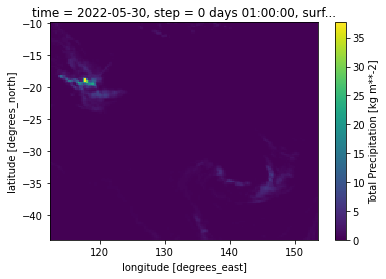

In [18]:
ds.tp.plot()

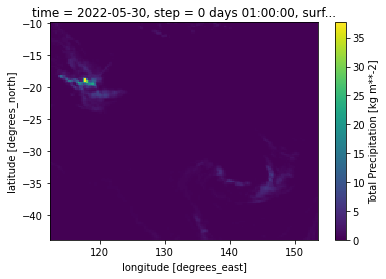

In [25]:
ds2.tp.plot()

# NEW

In [4]:
url = 'https://nomads.ncep.noaa.gov/cgi-bin/filter_gfs_0p25.pl?file=gfs.t00z.pgrb2.0p25.f000&lev_10_m_above_ground=on&lev_2_m_above_ground=on&lev_entire_atmosphere_%5C%28considered_as_a_single_layer%5C%29=on&lev_surface=on&var_CRAIN=on&var_PRMSL=on&var_RH=on&var_SOILW=on&var_TMP=on&var_UGRD=on&var_VGRD=on&leftlon=112.500&rightlon=154.688&toplat=-9.796&bottomlat=-43.835&dir=%2Fgfs.20220824%2F00%2Fatmos'

In [4]:
date_object = datetime.date.today()
date = [''.join(str(date_object).split('-'))]
yesterday = datetime.date.today() - timedelta(1)
date_yesterday = [''.join(str(yesterday).split('-'))]

In [5]:
for x in range(0,10):
    block_size = 1024 #1 Kibibyte
    filename = "gfs_{}.t00z.pgrb2.0p25.f00{}".format(date[0], x)
    dest = '/pollensource/gfs_real-time/'
    url = 'https://nomads.ncep.noaa.gov/cgi-bin/filter_gfs_0p25.pl?file=gfs.t00z.pgrb2.0p25.f00{}&all_lev=on&var_CRAIN=on&var_PRMSL=on&var_PWAT=on&var_RH=on&var_SOTYP=on&var_TMP=on&var_UGRD=on&var_VGRD=on&subregion=&leftlon=112.500&rightlon=154.688&toplat=-9.769&bottomlat=-43.835&dir=%2Fgfs.{}%2F00%2Fatmos'.format(x,date[0])
    print(url)
    print(f"Downloading {filename}...")
    site = urlopen(url)
    meta = site.info()
    # Streaming, so we can iterate over the response.
    response = requests.get(url, stream = True)
    total_size_in_bytes = int(meta["Content-Length"]) if meta["Content-Length"] is not None else 0
    with open(dest + filename, 'wb') as file:
        for data in response.iter_content(block_size):
            file.write(data)
    print("Done!\n")

https://nomads.ncep.noaa.gov/cgi-bin/filter_gfs_0p25.pl?file=gfs.t00z.pgrb2.0p25.f000&all_lev=on&var_CRAIN=on&var_PRMSL=on&var_PWAT=on&var_RH=on&var_SOTYP=on&var_TMP=on&var_UGRD=on&var_VGRD=on&subregion=&leftlon=112.500&rightlon=154.688&toplat=-9.769&bottomlat=-43.835&dir=%2Fgfs.20220920%2F00%2Fatmos
Done!

https://nomads.ncep.noaa.gov/cgi-bin/filter_gfs_0p25.pl?file=gfs.t00z.pgrb2.0p25.f001&all_lev=on&var_CRAIN=on&var_PRMSL=on&var_PWAT=on&var_RH=on&var_SOTYP=on&var_TMP=on&var_UGRD=on&var_VGRD=on&subregion=&leftlon=112.500&rightlon=154.688&toplat=-9.769&bottomlat=-43.835&dir=%2Fgfs.20220920%2F00%2Fatmos
Done!

https://nomads.ncep.noaa.gov/cgi-bin/filter_gfs_0p25.pl?file=gfs.t00z.pgrb2.0p25.f002&all_lev=on&var_CRAIN=on&var_PRMSL=on&var_PWAT=on&var_RH=on&var_SOTYP=on&var_TMP=on&var_UGRD=on&var_VGRD=on&subregion=&leftlon=112.500&rightlon=154.688&toplat=-9.769&bottomlat=-43.835&dir=%2Fgfs.20220920%2F00%2Fatmos
Done!

https://nomads.ncep.noaa.gov/cgi-bin/filter_gfs_0p25.pl?file=gfs.t00z.pgr

In [6]:
for x in range(10,24):
    block_size = 1024 #1 Kibibyte
    filename = "gfs_{}.t00z.pgrb2.0p25.f0{}".format(date[0], x)
    dest = '/pollensource/gfs_real-time/'
    url = 'https://nomads.ncep.noaa.gov/cgi-bin/filter_gfs_0p25.pl?file=gfs.t00z.pgrb2.0p25.f0{}&all_lev=on&var_CRAIN=on&var_PRMSL=on&var_PWAT=on&var_RH=on&var_SOTYP=on&var_TMP=on&var_UGRD=on&var_VGRD=on&subregion=&leftlon=112.500&rightlon=154.688&toplat=-9.769&bottomlat=-43.835&dir=%2Fgfs.{}%2F00%2Fatmos'.format(x,date[0])
    print(url)
    print(f"Downloading {filename}...")
    site = urlopen(url)
    meta = site.info()
    # Streaming, so we can iterate over the response.
    response = requests.get(url, stream = True)
    total_size_in_bytes = int(meta["Content-Length"]) if meta["Content-Length"] is not None else 0
    with open(dest + filename, 'wb') as file:
        for data in response.iter_content(block_size):
            file.write(data)
    print("Done!\n")

https://nomads.ncep.noaa.gov/cgi-bin/filter_gfs_0p25.pl?file=gfs.t00z.pgrb2.0p25.f010&all_lev=on&var_CRAIN=on&var_PRMSL=on&var_PWAT=on&var_RH=on&var_SOTYP=on&var_TMP=on&var_UGRD=on&var_VGRD=on&subregion=&leftlon=112.500&rightlon=154.688&toplat=-9.769&bottomlat=-43.835&dir=%2Fgfs.20220920%2F00%2Fatmos
Done!

https://nomads.ncep.noaa.gov/cgi-bin/filter_gfs_0p25.pl?file=gfs.t00z.pgrb2.0p25.f011&all_lev=on&var_CRAIN=on&var_PRMSL=on&var_PWAT=on&var_RH=on&var_SOTYP=on&var_TMP=on&var_UGRD=on&var_VGRD=on&subregion=&leftlon=112.500&rightlon=154.688&toplat=-9.769&bottomlat=-43.835&dir=%2Fgfs.20220920%2F00%2Fatmos
Done!

https://nomads.ncep.noaa.gov/cgi-bin/filter_gfs_0p25.pl?file=gfs.t00z.pgrb2.0p25.f012&all_lev=on&var_CRAIN=on&var_PRMSL=on&var_PWAT=on&var_RH=on&var_SOTYP=on&var_TMP=on&var_UGRD=on&var_VGRD=on&subregion=&leftlon=112.500&rightlon=154.688&toplat=-9.769&bottomlat=-43.835&dir=%2Fgfs.20220920%2F00%2Fatmos
Done!

https://nomads.ncep.noaa.gov/cgi-bin/filter_gfs_0p25.pl?file=gfs.t00z.pgr

In [7]:
#download yesterdays's last file
block_size = 1024 #1 Kibibyte
filename = "gfs_{}.t00z.pgrb2.0p25.f0{}".format(date_yesterday[0],24 )
dest = '/pollensource/gfs_real-time/'
url = 'https://nomads.ncep.noaa.gov/cgi-bin/filter_gfs_0p25.pl?file=gfs.t00z.pgrb2.0p25.f0{}&all_lev=on&var_CRAIN=on&var_PRMSL=on&var_PWAT=on&var_RH=on&var_SOTYP=on&var_TMP=on&var_UGRD=on&var_VGRD=on&subregion=&leftlon=112.500&rightlon=154.688&toplat=-9.769&bottomlat=-43.835&dir=%2Fgfs.{}%2F00%2Fatmos'.format(x,date[0])
print(url)
print(f"Downloading {filename}...")
site = urlopen(url)
meta = site.info()
# Streaming, so we can iterate over the response.
response = requests.get(url, stream = True)
total_size_in_bytes = int(meta["Content-Length"]) if meta["Content-Length"] is not None else 0
with open(dest + filename, 'wb') as file:
    for data in response.iter_content(block_size):
        file.write(data)
print("Done!\n")

https://nomads.ncep.noaa.gov/cgi-bin/filter_gfs_0p25.pl?file=gfs.t00z.pgrb2.0p25.f023&all_lev=on&var_CRAIN=on&var_PRMSL=on&var_PWAT=on&var_RH=on&var_SOTYP=on&var_TMP=on&var_UGRD=on&var_VGRD=on&subregion=&leftlon=112.500&rightlon=154.688&toplat=-9.769&bottomlat=-43.835&dir=%2Fgfs.20220920%2F00%2Fatmos
Done!



In [3]:
# aggregate the hourly data and create variables

def aggregateData9am(dataf):
    #temperature
    grouped_t = dataf.groupby(['coord']).agg({'t': ['mean', 'min', 'max', np.std]})
    grouped_t.columns = ['t_mean_9am', 't_min_9am', 't_max_9am', 't_sd_9am']
    grouped_t = grouped_t.reset_index()

    #temperature at 2m
    grouped_t_2m = dataf.groupby(['coord']).agg({'t_2m': ['mean', 'min', 'max', np.std]})
    grouped_t_2m.columns = ['t_2m_mean_9am', 't_2m_min_9am', 't_2m_max_9am', 't_2m_sd_9am']
    grouped_t_2m = grouped_t_2m.reset_index()

    #Pressure at mean sea level
    grouped_msl = dataf.groupby(['coord']).agg({'msl': ['mean', 'min', 'max', np.std]})
    grouped_msl.columns = ['msl_mean_9am', 'msl_min_9am', 'msl_max_9am', 'msl_sd_9am']
    grouped_msl = grouped_msl.reset_index()

    #Relative humidity entire atmosphere
    grouped_hum_atmos = dataf.groupby(['coord']).agg({'hum_atmos': ['mean', 'min', 'max', np.std]})
    grouped_hum_atmos.columns = ['hum_atmos_mean_9am', 'hum_atmos_min_9am', 'hum_atmos_max_9am', 'hum_atmos_sd_9am']
    grouped_hum_atmos = grouped_hum_atmos.reset_index()

    #u component of wind at 10m
    grouped_u_10m = dataf.groupby(['coord']).agg({'u_10m': ['mean', 'min', 'max', np.std]})
    grouped_u_10m.columns = ['u_10m_mean_9am', 'u_10m_min_9am', 'u_10m_max_9am', 'u_10m_sd_9am']
    grouped_u_10m = grouped_u_10m.reset_index()
    
    #v component of wind at 10m 
    grouped_v_10m = dataf.groupby(['coord']).agg({'v_10m': ['mean', 'min', 'max', np.std]})
    grouped_v_10m.columns = ['v_10m_mean_9am', 'v_10m_min_9am', 'v_10m_max_9am', 'v_10m_sd_9am']
    grouped_v_10m = grouped_v_10m.reset_index()


    # precipitable water 
    grouped_pwat = dataf.groupby(['coord']).agg({'pwat': ['mean', 'min', 'max', np.std]})
    grouped_pwat.columns = ['pwat_mean_9am', 'pwat_min_9am', 'pwat_max_9am', 'pwat_sd_9am']
    grouped_pwat = grouped_pwat.reset_index()
    
    #volumetric soil moisture content
    #grouped_soilw = dataf.groupby(['coord']).agg({'soilw': ['mean', 'min', 'max', np.std]})
    #grouped_soilw.columns = ['soilw_mean_9am', 'soilw_min_9am', 'soilw_max_9am', 'soilw_sd_9am']
    #grouped_soilw = grouped_soilw.reset_index()


    agg_data = grouped_t.merge(grouped_t_2m, how = 'left', on = 'coord')
    agg_data = agg_data.merge(grouped_msl, how = 'left', on = 'coord')
    agg_data = agg_data.merge(grouped_hum_atmos, how = 'left', on = 'coord')
    agg_data = agg_data.merge(grouped_u_10m, how = 'left', on = 'coord')
    agg_data = agg_data.merge(grouped_v_10m, how = 'left', on = 'coord')
    #agg_data = agg_data.merge(grouped_crain, how = 'left', on ='coord')
    #agg_data = agg_data.merge(grouped_soilw, how = 'left', on = 'coord')
    agg_data = agg_data.merge(grouped_pwat, how = 'left', on = 'coord')
    dateval = np.min(dataf.date.unique())
    agg_data['date'] = dateval
    


    return agg_data

In [5]:
def filterAus(file):
    lat_filter = (file["lat"] >= -43.835) & (file["lat"] <= -9.796)
    lon_filter = (file["lon"] >= 112.500) & (file["lon"] <= 154.688)
    filtered = file.loc[lat_filter & lon_filter]
    return filtered.reset_index(drop=True)

In [6]:
# extract relevant data from the grib files

def getData(filename):

    fileAddress = '/pollensource/gfs_real-time/' + filename
    myfile = pygrib.open(fileAddress)

    # get surface level temperature data
    grb_temp = myfile.select(shortName='t', typeOfLevel = 'surface')
    lat = grb_temp[0].latitudes
    lon = grb_temp[0].longitudes
    vals = grb_temp[0].values.reshape(lon.shape[0],)
    date = grb_temp[0].validDate
    # print(date)
    
    df = pd.DataFrame(None,index=range(lon.shape[0]), columns=['datetime', 'lat', 'lon', 't'])  
    df['datetime'] = date
    df['lat'] = lat
    df['lon'] = lon
    df['t'] = vals
    df['date'] = pd.to_datetime(df['datetime']).dt.date
    print(df)
    # get 2m level temperature data
    grb_temp_2m = myfile.select(shortName='2t')
    vals_2t = grb_temp_2m[0].values.reshape(lon.shape[0],)
    df['t_2m'] = vals_2t

    # get mean sea level pressure
    grb_msl = myfile.select(shortName='prmsl')
    vals_msl = grb_msl[0].values.reshape(lon.shape[0],)
    df['msl'] = vals_msl

    # get 10m u component of wind
    grb_10u = myfile.select(shortName='10u')
    vals_10u = grb_10u[0].values.reshape(lon.shape[0],)
    df['u_10m'] = vals_10u

    # get 10m v component of wind
    grb_10v = myfile.select(shortName='10v')
    vals_10v = grb_10v[0].values.reshape(lon.shape[0],)
    df['v_10m'] = vals_10v

    # get the relative humidity
    grb_r = myfile.select(shortName='r')
    vals_r = grb_r[0].values.reshape(lon.shape[0],)
    df['hum_atmos'] = vals_r

    #get precipitable water 
    grb_pwat = myfile.select(shortName='pwat')
    vals_pwat = grb_pwat[0].values.reshape(lon.shape[0],)
    df['pwat'] = vals_pwat

    
    data  = filterAus(df)
    # print(data)
    # data['coord'] = (data['lon'], data['lat'])
    data['coord'] = list(zip(data.lon, data.lat))
    data.coord = data.coord.astype(str)

    data = data.drop(['lat', 'lon'], axis = 1)

    return data


In [18]:
filename2 = '/pollensource/gfs_real-time/gfs_20220920.t00z.pgrb2.0p25.f000'
myfile2 = pygrib.open(filename2)

vars_2020 = dict()
for grb_element in myfile2:
    if grb_element['shortName'] not in vars_2020:
        vars_2020[grb_element['shortName']] = grb_element['name']

In [17]:
vars_2020

{'prmsl': 'Pressure reduced to MSL',
 'u': 'U component of wind',
 'v': 'V component of wind',
 't': 'Temperature',
 'r': 'Relative humidity',
 '2t': '2 metre temperature',
 '2r': '2 metre relative humidity',
 '10u': '10 metre U wind component',
 '10v': '10 metre V wind component',
 'crain': 'Categorical rain',
 'slt': 'Soil type',
 'pwat': 'Precipitable water',
 '100u': '100 metre U wind component',
 '100v': '100 metre V wind component'}

In [7]:
mainDF = pd.DataFrame()
directory = os.fsencode('/pollensource/gfs_real-time')
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    dayDF = getData(filename)
    # print(dayDF)
    dayDFF = dayDF[:50000]
    mainDF = pd.concat([mainDF,dayDFF], ignore_index = True)
    

                 datetime    lat     lon           t        date
0     2022-09-20 03:00:00 -43.75  112.50  282.328101  2022-09-20
1     2022-09-20 03:00:00 -43.75  112.75  282.328101  2022-09-20
2     2022-09-20 03:00:00 -43.75  113.00  282.328101  2022-09-20
3     2022-09-20 03:00:00 -43.75  113.25  282.328101  2022-09-20
4     2022-09-20 03:00:00 -43.75  113.50  282.328101  2022-09-20
...                   ...    ...     ...         ...         ...
22979 2022-09-20 03:00:00 -10.00  153.50  302.428101  2022-09-20
22980 2022-09-20 03:00:00 -10.00  153.75  302.428101  2022-09-20
22981 2022-09-20 03:00:00 -10.00  154.00  302.428101  2022-09-20
22982 2022-09-20 03:00:00 -10.00  154.25  302.428101  2022-09-20
22983 2022-09-20 03:00:00 -10.00  154.50  302.428101  2022-09-20

[22984 rows x 5 columns]
                 datetime    lat     lon          t        date
0     2022-09-20 08:00:00 -43.75  112.50  282.29917  2022-09-20
1     2022-09-20 08:00:00 -43.75  112.75  282.29917  2022-09-20
2 

In [10]:
dayDFF

,datetime,t,date,t_2m,msl,u_10m,v_10m,hum_atmos,pwat,coord
0,2022-09-20 01:00:00,282.328101,2022-09-20,281.114429,99570.95,13.353604,2.813246,0.1,8.03752,"(112.5, -43.75)"
1,2022-09-20 01:00:00,282.328101,2022-09-20,281.014429,99556.55,13.443604,2.673246,0.1,7.90312,"(112.75, -43.75)"
2,2022-09-20 01:00:00,282.328101,2022-09-20,281.114429,99548.15,13.363604,2.663246,0.1,7.79912,"(113.0, -43.75)"
3,2022-09-20 01:00:00,282.328101,2022-09-20,281.114429,99543.75,13.443604,2.603246,0.1,7.72392,"(113.25, -43.75)"
4,2022-09-20 01:00:00,282.328101,2022-09-20,281.114429,99533.15,13.523604,2.623246,0.1,7.66792,"(113.5, -43.75)"
...,...,...,...,...,...,...,...,...,...,...
22979,2022-09-20 01:00:00,302.428101,2022-09-20,300.414429,101148.35,-6.606396,5.113246,0.1,61.29352,"(153.5, -10.0)"
22980,2022-09-20 01:00:00,302.428101,2022-09-20,301.214429,101142.15,-6.816396,4.853246,0.1,60.22152,"(153.75, -10.0)"
22981,2022-09-20 01:00:00,302.428101,2022-09-20,301.114429,101131.95,-7.116396,4.453246,0.1,58.90952,"(154.0, -10.0)"
22982,2022-09-20 01:00:00,302.428101,2022-09-20,301.314429,101128.15,-7.296396,4.063246,0.1,58.63272,"(154.25, -10.0)"


In [8]:
DF1 = aggregateData9am(mainDF)

In [9]:
mainDF

,datetime,t,date,t_2m,msl,u_10m,v_10m,hum_atmos,pwat,coord
0,2022-09-20 03:00:00,282.328101,2022-09-20,280.979541,99636.075,13.517593,1.612853,0.1,8.365399,"(112.5, -43.75)"
1,2022-09-20 03:00:00,282.328101,2022-09-20,281.079541,99620.675,13.567593,1.332853,0.1,8.382999,"(112.75, -43.75)"
2,2022-09-20 03:00:00,282.328101,2022-09-20,281.179541,99604.875,13.297593,0.862853,0.1,8.398999,"(113.0, -43.75)"
3,2022-09-20 03:00:00,282.328101,2022-09-20,281.179541,99595.675,13.017593,0.742853,0.1,8.298199,"(113.25, -43.75)"
4,2022-09-20 03:00:00,282.328101,2022-09-20,281.179541,99593.075,12.967593,1.102853,0.1,8.122199,"(113.5, -43.75)"
...,...,...,...,...,...,...,...,...,...,...
574595,2022-09-20 01:00:00,302.428101,2022-09-20,300.414429,101148.350,-6.606396,5.113246,0.1,61.293520,"(153.5, -10.0)"
574596,2022-09-20 01:00:00,302.428101,2022-09-20,301.214429,101142.150,-6.816396,4.853246,0.1,60.221520,"(153.75, -10.0)"
574597,2022-09-20 01:00:00,302.428101,2022-09-20,301.114429,101131.950,-7.116396,4.453246,0.1,58.909520,"(154.0, -10.0)"
574598,2022-09-20 01:00:00,302.428101,2022-09-20,301.314429,101128.150,-7.296396,4.063246,0.1,58.632720,"(154.25, -10.0)"


In [11]:
DF1

,coord,t_mean_9am,t_min_9am,t_max_9am,t_sd_9am,t_2m_mean_9am,t_2m_min_9am,t_2m_max_9am,t_2m_sd_9am,msl_mean_9am,...,u_10m_sd_9am,v_10m_mean_9am,v_10m_min_9am,v_10m_max_9am,v_10m_sd_9am,pwat_mean_9am,pwat_min_9am,pwat_max_9am,pwat_sd_9am,date
0,"(112.5, -10.0)",299.747105,299.679175,299.842603,0.056216,299.411535,299.200000,299.614429,0.118858,101245.9675,...,0.740515,5.555951,4.136450,7.540613,0.905776,35.220013,29.737031,38.757480,2.826746,2022-09-20
1,"(112.5, -10.25)",299.719105,299.679175,299.800000,0.034094,299.355535,298.975952,299.638574,0.188136,101261.2795,...,0.696822,5.052751,3.512853,6.334578,0.714364,31.738605,27.840599,35.082273,2.442225,2022-09-20
2,"(112.5, -10.5)",299.763105,299.679175,299.828101,0.051112,299.167535,298.745557,299.579541,0.226836,101275.7435,...,0.818705,4.893151,3.969647,5.661705,0.480634,29.525613,27.068665,32.084821,1.540238,2022-09-20
3,"(112.5, -10.75)",299.771105,299.679175,299.828101,0.050303,299.011535,298.743604,299.437720,0.169803,101288.7995,...,0.945783,4.806351,3.960613,5.347760,0.374653,28.357677,26.867920,29.853428,0.826425,2022-09-20
4,"(112.5, -11.0)",299.783105,299.697534,299.900000,0.054171,298.955535,298.575952,299.237695,0.169436,101299.3035,...,1.159068,4.976751,4.010613,6.007760,0.524371,27.183149,25.493266,28.509668,0.789481,2022-09-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22979,"(154.5, -42.75)",285.279105,285.099170,285.408228,0.084673,285.275535,284.914429,285.699976,0.230935,102090.2315,...,2.155430,-3.094849,-6.936965,2.048434,3.687620,13.727277,11.808599,15.950866,1.273552,2022-09-20
22980,"(154.5, -43.0)",285.043105,284.899170,285.208228,0.091020,285.099535,284.712427,285.499976,0.254890,102071.6555,...,1.937828,-3.223649,-7.026965,1.992853,3.657604,13.769709,11.870999,16.430866,1.417801,2022-09-20
22981,"(154.5, -43.25)",284.695105,284.500000,284.828101,0.078650,284.931535,284.579541,285.312598,0.248762,102054.3355,...,1.664542,-3.327649,-7.398295,1.722853,3.563241,13.798957,11.482199,16.923666,1.566537,2022-09-20
22982,"(154.5, -43.5)",284.515105,284.299170,284.708228,0.117182,284.731535,284.379541,285.112598,0.242885,102033.9755,...,1.316727,-3.570449,-7.778295,1.942853,3.303828,13.743597,11.637369,17.160466,1.652918,2022-09-20


In [10]:

min_lat = -43.835
max_lat = -9.796    
min_lon = 112.500
max_lon = 154.688


In [13]:
def addToDb(df):

    databse = 'gfs_data'
    user = 'gfs'
    password = 'pollenmelb'
    host="127.0.0.1"

    conn_string = f"postgresql://{user}:{password}@{host}/{databse}"
    engine = create_engine(conn_string)
    
    if len(df.columns)<10:
        table_name = 'weatherRaw'
    else:
        table_name = 'weather'

    if_exists = 'append'

    #Write the data to postgres

    with engine.connect() as con:
        df.to_sql(
            name=table_name.lower(), 
            con=con, 
            if_exists=if_exists,
            index = False
        )

In [ ]:
for x in range(0,10):
    os.remove(r'/pollensource/gfs_real-time/gfs_{}.t00z.pgrb2.0p25.f00{}'.format(date[0], x))

for x in range(10,24):
    os.remove(r'/pollensource/gfs_real-time/gfs_{}.t00z.pgrb2.0p25.f0{}'.format(date[0], x))
    
os.remove(r'/pollensource/gfs_real-time/gfs_{}.t00z.pgrb2.0p25.f0{}'.format(date_yesterday[0], 24))

In [2]:
filename = '/pollensource/gfs_real-time/gfs_20220919.t00z.pgrb2.0p25.f024'
myfile = pygrib.open(filename)


In [4]:
for grb in myfile:
    print(grb.validDate)

In [5]:
grb_temp = myfile.select(shortName = 't')

In [7]:
grb_temp[0].validDate

datetime.datetime(2022, 9, 20, 23, 0)

In [14]:
addToDb(DF1)